In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("Boston.csv")

In [26]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
X = pd.DataFrame(df.drop(columns='medv'))
y = pd.Series(df['medv'], name="MEDV")

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_:.2f}")

print("Coefficients:")
for c in model.coef_:
    print(f"{c:.3f}")

Intercept: 30.25
Coefficients:
-0.113
0.030
0.040
2.784
-17.203
4.439
-0.006
-1.448
0.262
-0.011
-0.915
0.012
-0.509


In [53]:
equation = "Price = {:.2f}".format(model.intercept_)
for feat, coef in zip(X.columns, model.coef_):
    equation += " + ({:.2f} * {})".format(coef, feat)

print(equation)

Price = 30.25 + (-0.11 * crim) + (0.03 * zn) + (0.04 * indus) + (2.78 * chas) + (-17.20 * nox) + (4.44 * rm) + (-0.01 * age) + (-1.45 * dis) + (0.26 * rad) + (-0.01 * tax) + (-0.92 * ptratio) + (0.01 * black) + (-0.51 * lstat)


In [43]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 24.291119474973538


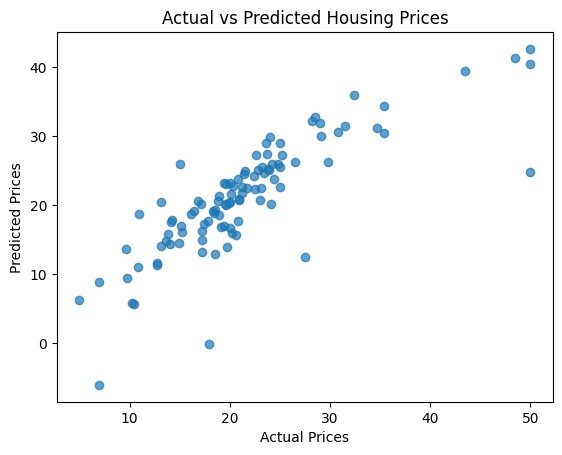

In [57]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()